In [1]:
import pandas as pd

In [4]:
accData=pd.read_csv('data\한국도로교통공단_시도 시군구별 교통사고 통계_20231231.csv',encoding='cp949')
accData.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,988,8,240,1009,82
1,서울,중구,931,3,217,877,100
2,서울,용산구,996,11,261,1077,28
3,서울,성동구,919,6,203,959,59
4,서울,동대문구,1674,10,424,1452,163


# 1. 시도 구군별 교통사고 데이터 확인

In [5]:
accData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      230 non-null    object
 1   시군구     230 non-null    object
 2   사고건수    230 non-null    int64 
 3   사망자수    230 non-null    int64 
 4   중상자수    230 non-null    int64 
 5   경상자수    230 non-null    int64 
 6   부상신고자수  230 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.7+ KB


## 1-1. 시도별 사망자 수, 중상자 수, 경상자 수, 부상 신고자 수, 부상자 수 평균

In [6]:
accData.columns # 출력 결과 중 일부를 끌어다 복붙하기

Index(['시도', '시군구', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')

In [11]:
accData.groupby('시도')[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].mean()

,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도,,,,,
강원,337.722222,7.777778,105.777778,366.055556,47.833333
경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
경남,617.888889,13.166667,245.111111,554.555556,55.777778
경북,468.565217,11.434783,162.956522,471.913043,43.217391
광주,1394.400000,9.600000,218.800000,1781.200000,98.000000
대구,1208.888889,9.555556,298.333333,1285.333333,126.111111
대전,1479.600000,12.200000,311.800000,1740.600000,73.400000
부산,687.687500,6.437500,207.437500,670.562500,57.437500
서울,1352.440000,7.200000,312.360000,1362.600000,141.600000


In [8]:
accData.groupby('시도',as_index=False)[['사망자수', '중상자수', '경상자수', '부상신고자수']].mean()

,시도,사망자수,중상자수,경상자수,부상신고자수
0,강원,7.777778,105.777778,366.055556,47.833333
1,경기,16.193548,410.451613,1910.322581,202.903226
2,경남,13.166667,245.111111,554.555556,55.777778
3,경북,11.434783,162.956522,471.913043,43.217391
4,광주,9.600000,218.800000,1781.200000,98.000000
5,대구,9.555556,298.333333,1285.333333,126.111111
6,대전,12.200000,311.800000,1740.600000,73.400000
7,부산,6.437500,207.437500,670.562500,57.437500
8,서울,7.200000,312.360000,1362.600000,141.600000
9,세종,13.000000,316.000000,1026.000000,382.000000


In [12]:
시도별=accData.groupby('시도',as_index=False)[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].mean()
시도별.head()

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,337.722222,7.777778,105.777778,366.055556,47.833333
1,경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
2,경남,617.888889,13.166667,245.111111,554.555556,55.777778
3,경북,468.565217,11.434783,162.956522,471.913043,43.217391
4,광주,1394.400000,9.600000,218.800000,1781.200000,98.000000


## 1-2. 사고 건수 평균을 기준으로 상위 5개 도시에 대한 '중상자수', '경상자수', '부상신고자수' 평균 비교 및 그래프 그리기

In [15]:
top5=시도별.sort_values('사고건수',ascending=False).head() # 상위 5개
top5

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
14,제주,1975.000000,22.500000,569.000000,2069.000000,304.000000
1,경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
6,대전,1479.600000,12.200000,311.800000,1740.600000,73.400000
4,광주,1394.400000,9.600000,218.800000,1781.200000,98.000000
8,서울,1352.440000,7.200000,312.360000,1362.600000,141.600000


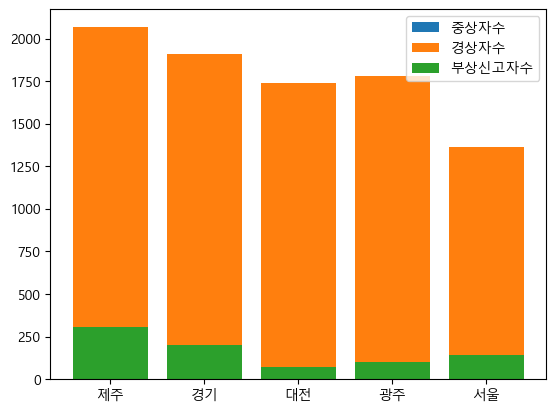

In [17]:
# 세로 막대 차트로 비교: matplotlib을 이용하여

import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.bar(top5['시도'],top5['중상자수'],label='중상자수') # 덧대어 그리는 방식이라서 이 데이터가 안 보임
plt.bar(top5['시도'],top5['경상자수'],label='경상자수')
plt.bar(top5['시도'],top5['부상신고자수'],label='부상신고자수')

plt.legend()
plt.show()

In [18]:
top5.index

Index([14, 1, 6, 4, 8], dtype='int64')

In [20]:
import numpy as np

np.arange(len(top5['시도']))

array([0, 1, 2, 3, 4])

In [21]:
list(range(len(top5['시도']))) # 같은데 왜 numpy를? 속도가 더 빨라서!

[0, 1, 2, 3, 4]

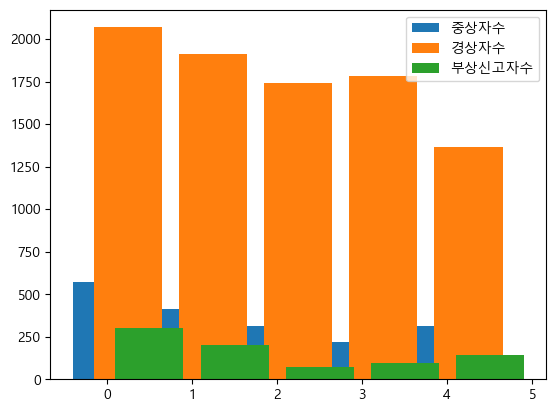

In [23]:
# 해결
pos=np.arange(len(top5['시도']))
plt.bar(pos,top5['중상자수'],label='중상자수')
plt.bar(pos+0.25,top5['경상자수'],label='경상자수')
plt.bar(pos+0.5,top5['부상신고자수'],label='부상신고자수')

plt.legend()
plt.show()

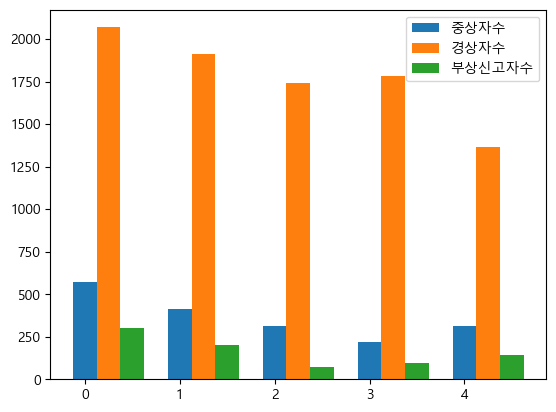

In [26]:
pos=np.arange(len(top5['시도']))
plt.bar(pos,top5['중상자수'],label='중상자수',width=0.25)
plt.bar(pos+0.25,top5['경상자수'],label='경상자수',width=0.25)
plt.bar(pos+0.5,top5['부상신고자수'],label='부상신고자수',width=0.25)

plt.legend()
plt.show()

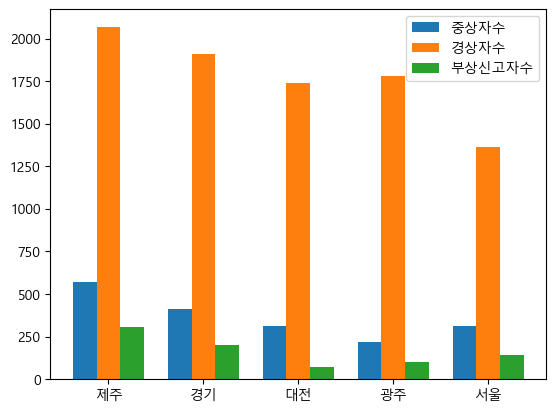

In [27]:
pos=np.arange(len(top5['시도']))
plt.bar(pos,top5['중상자수'],label='중상자수',width=0.25)
plt.bar(pos+0.25,top5['경상자수'],label='경상자수',width=0.25)
plt.bar(pos+0.5,top5['부상신고자수'],label='부상신고자수',width=0.25)
plt.xticks(pos+0.25,top5['시도'])

plt.legend()
plt.show()

<Axes: >

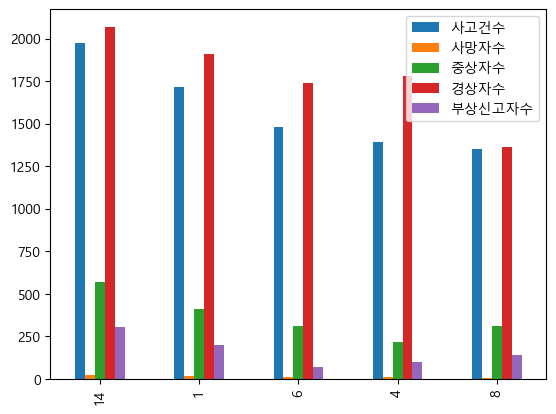

In [28]:
# sol2: pandas.plot 이용

top5.plot(kind='bar')

<Axes: xlabel='시도'>

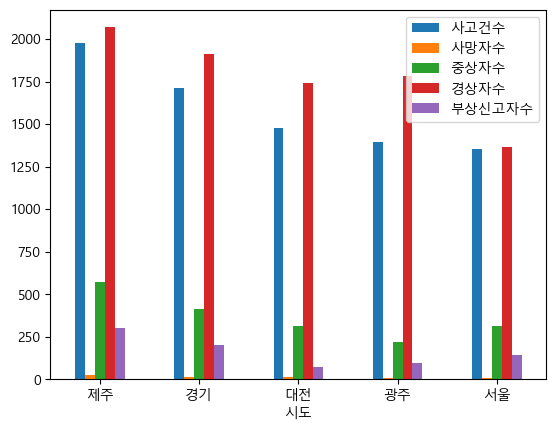

In [29]:
top5.plot(kind='bar',x='시도',rot=0)

<Axes: xlabel='시도'>

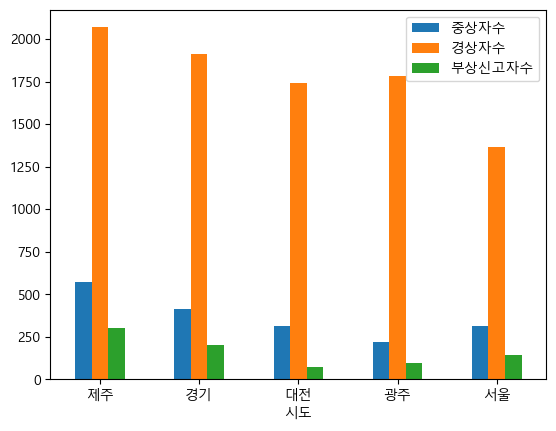

In [34]:
top5.plot(kind='bar',x='시도',y=['중상자수','경상자수','부상신고자수'],rot=0)

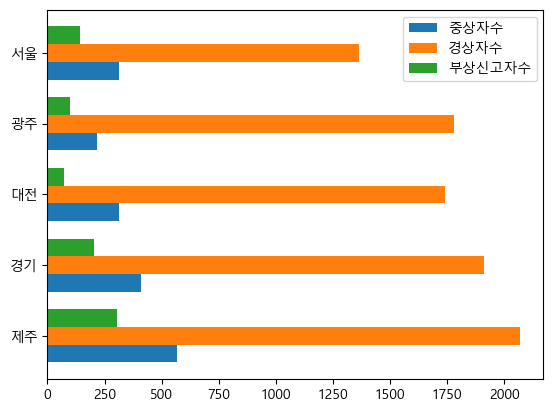

In [36]:
# 누워서!

pos=np.arange(len(top5['시도']))
plt.barh(pos,top5['중상자수'],label='중상자수',height=0.25)
plt.barh(pos+0.25,top5['경상자수'],label='경상자수',height=0.25)
plt.barh(pos+0.5,top5['부상신고자수'],label='부상신고자수',height=0.25)
plt.yticks(pos+0.25,top5['시도'])

plt.legend()
plt.show()

## 2. 사망자 수 평균 비율이 가장 높은/가장 낮은 도시는 어디인가?

In [37]:
시도별.head()

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,337.722222,7.777778,105.777778,366.055556,47.833333
1,경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
2,경남,617.888889,13.166667,245.111111,554.555556,55.777778
3,경북,468.565217,11.434783,162.956522,471.913043,43.217391
4,광주,1394.400000,9.600000,218.800000,1781.200000,98.000000


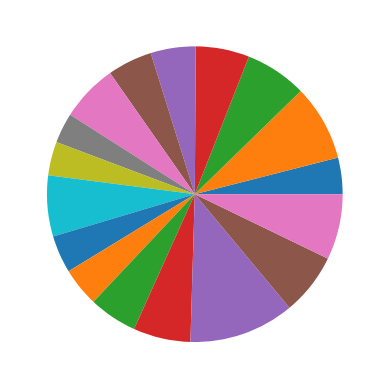

In [39]:
# 원 그래프는 matplotlib에만!

plt.pie(시도별['사망자수'])
plt.show()

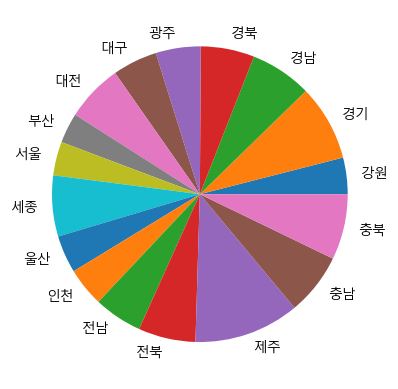

In [40]:
plt.pie(시도별['사망자수'],labels=시도별['시도'])
plt.show()

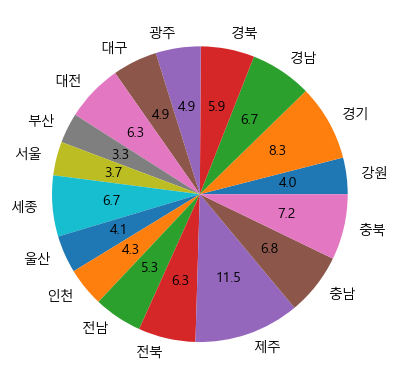

In [42]:
plt.pie(시도별['사망자수'],labels=시도별['시도'],autopct='%.1f')
plt.show()

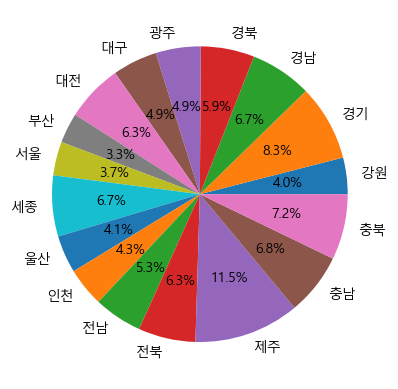

In [43]:
plt.pie(시도별['사망자수'],labels=시도별['시도'],autopct='%.1f%%')
plt.show()

* 중상자 수

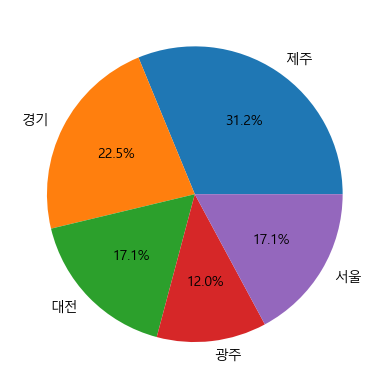

In [44]:
plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.1f%%')
plt.show()

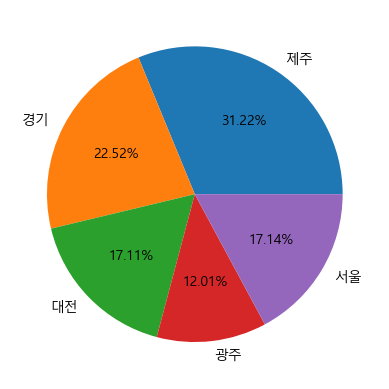

In [47]:
plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.2f%%'); # ;이 plt.show()의 역할을 함

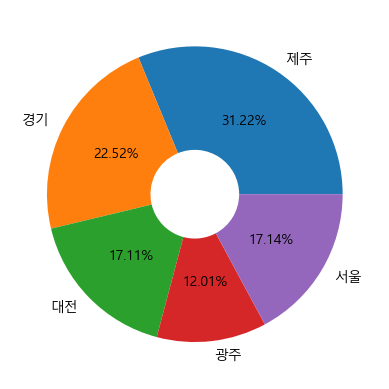

In [49]:
# 도넛형은?

plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.2f%%',wedgeprops={'width':0.7});

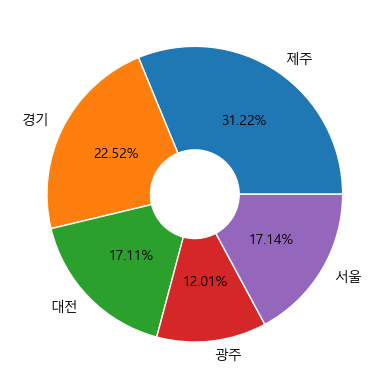

In [50]:
plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.2f%%',wedgeprops={'width':0.7,'edgecolor':'w'});

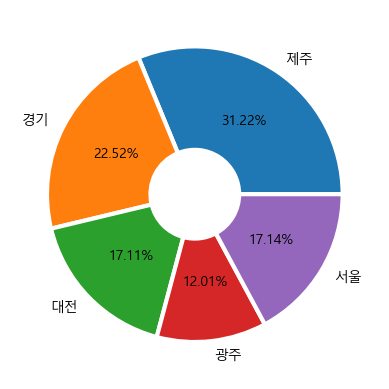

In [51]:
plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.2f%%',wedgeprops={'width':0.7,'edgecolor':'w','linewidth':3});

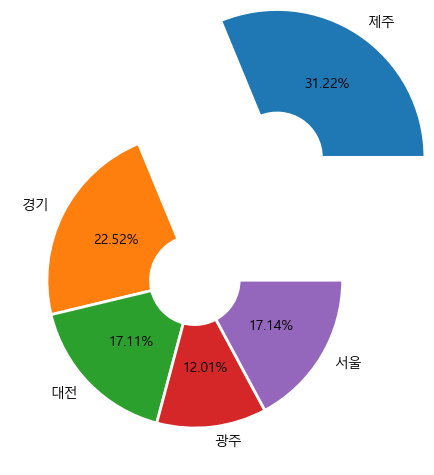

In [52]:
# 가장 비율이 높은 제주를 분리해 보자

exp=[1,0,0,0,0]
plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.2f%%',wedgeprops={'width':0.7,'edgecolor':'w','linewidth':2},explode=exp);

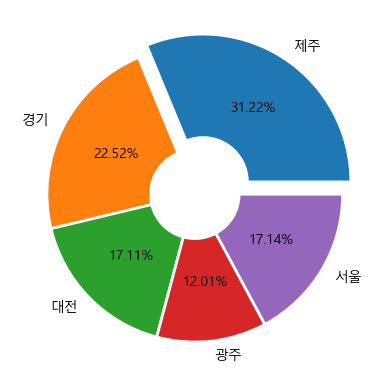

In [55]:
exp=[0.1,0,0,0,0]
plt.pie(top5['중상자수'],labels=top5['시도'],autopct='%.2f%%',wedgeprops={'width':0.7,'edgecolor':'w','linewidth':2},explode=exp);